In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url,usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare'],na_values=np.nan)
titanic.columns



Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [59]:
titanic.iloc[1,:].values

array([1, 1, 'female', 38.0, 1, 0, 71.2833], dtype=object)

In [53]:
cols=list(titanic.columns[1:])

In [54]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [15]:
titanic['Gender']=np.where(titanic['Sex']=='male',1,0)

In [16]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [17]:


means=np.random.randint(titanic['Age'].quantile(0.25),titanic['Age'].quantile(0.75),pd.isnull(titanic['Age']).sum())

In [18]:
idx=titanic[pd.isnull(titanic['Age'])].index

In [19]:
miss_dict={idx[i]:ele for i,ele in enumerate(means)}

In [20]:
titanic['Age']=titanic['Age'].fillna(miss_dict)

In [21]:
titanic['Parch_enc']=np.where(titanic.Parch>=1,1,0)

In [22]:
titanic['Sibsp_enc']=titanic['SibSp'].map({0:0,1:1,2:2,3:2,4:2,5:2,8:2})

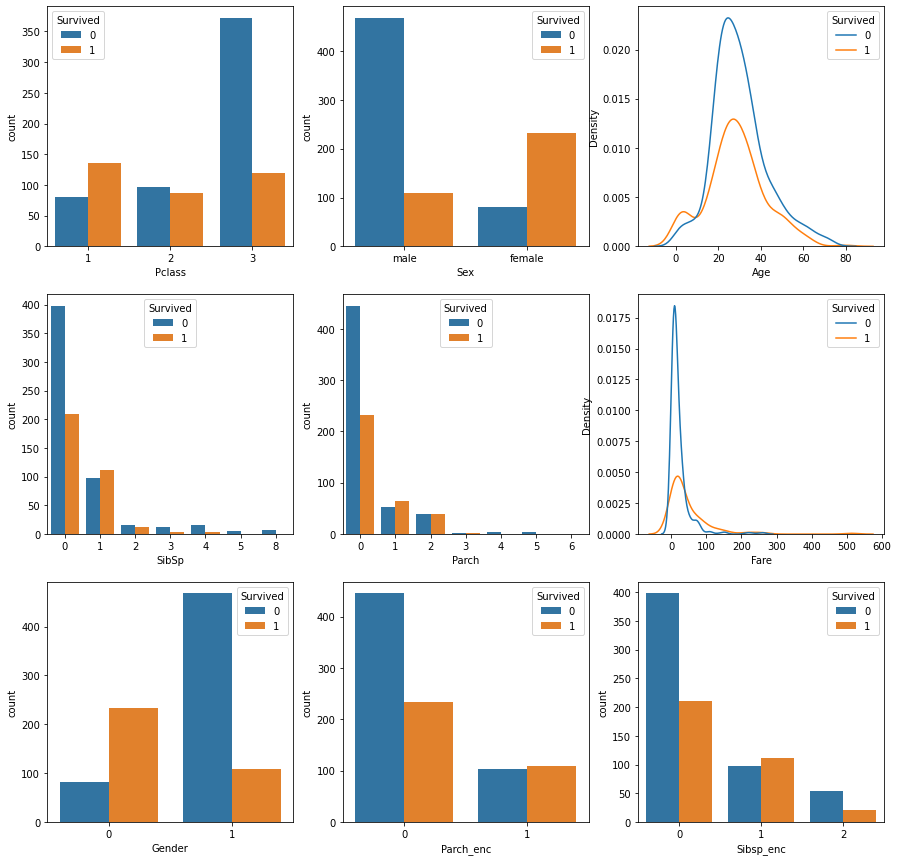

In [23]:
plt.figure(figsize=(15,15))
for i, col in enumerate(titanic.columns):
    if col != 'Survived':
        plt.subplot(3,3,i)
        if col=='Age':
            sns.kdeplot(data=titanic,x=col,hue='Survived')
        elif col=='Fare':
            sns.kdeplot(data=titanic,x=col,hue='Survived')
        else:
            sns.countplot(data=titanic,x=col,hue='Survived')

In [24]:
titanic[(titanic['Fare']<10)&(titanic['Sibsp_enc']==1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Gender,Parch_enc,Sibsp_enc
0,0,3,male,22.0,1,0,7.2500,1,0,1
40,0,3,female,40.0,1,0,9.4750,0,0,1
113,0,3,female,20.0,1,0,9.8250,0,0,1
175,0,3,male,18.0,1,1,7.8542,1,1,1
192,1,3,female,19.0,1,0,7.8542,0,0,1
214,0,3,male,37.0,1,0,7.7500,1,0,1
267,1,3,male,25.0,1,0,7.7750,1,0,1
352,0,3,male,15.0,1,1,7.2292,1,1,1
371,0,3,male,18.0,1,0,6.4958,1,0,1
402,0,3,female,21.0,1,0,9.8250,0,0,1


In [25]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Gender,Parch_enc,Sibsp_enc
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,1
2,1,3,female,26.0,0,0,7.9250,0,0,0
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,1,0,0


In [26]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,f1_score,classification_report,plot_precision_recall_curve,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [27]:
X=titanic.drop(['Survived','Sex','SibSp','Parch'],axis=1)
Y=titanic.Survived
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 809 to 272
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     712 non-null    int64  
 1   Age        712 non-null    float64
 2   Fare       712 non-null    float64
 3   Gender     712 non-null    int64  
 4   Parch_enc  712 non-null    int64  
 5   Sibsp_enc  712 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 38.9 KB


In [29]:
strategy=['mean','most_frequent','median']

In [30]:
# for st in strategy:
#     print(st)
#     steps=[('imputer',SimpleImputer(strategy='median')),('cls',DecisionTreeClassifier(max_depth=5,random_state=9,class_weight='balanced'))]
#     pipe=Pipeline(steps=steps)
#     pipe.fit(x_train,y_train)
#     cv=StratifiedKFold(n_splits=5)
#     scores=cross_val_score(estimator=pipe,X=x_test,y=y_test,cv=cv,scoring='f1_micro')
#     y_pred=pipe.predict(x_test)
#     test_score=f1_score(y_test,y_pred)
#     print('Cross-val score is {}'.format(np.mean(scores)))
#     print('test score is {}'.format(test_score))
#     con=confusion_matrix(y_test,y_pred)
#     ConfusionMatrixDisplay(con).plot()
#     print('-----')
    

Cross-val score is 0.7851176992022063
-----
test score is 0.6666666666666667
-----
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       112
           1       0.61      0.73      0.67        67

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.74      0.73      0.73       179

-----


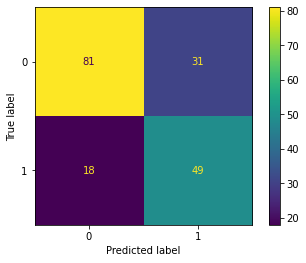

In [31]:
steps=[('imputer',SimpleImputer(strategy='median')),('cls',DecisionTreeClassifier(max_depth=5,random_state=9,class_weight='balanced'))]
pipe=Pipeline(steps=steps)
pipe.fit(x_train,y_train)
cv=StratifiedKFold(n_splits=5)
scores=cross_val_score(estimator=pipe,X=x_train,y=y_train,cv=cv,scoring='f1_micro')
y_pred=pipe.predict(x_test)
test_score=f1_score(y_test,y_pred)
print('Cross-val score is {}'.format(np.mean(scores)))
print('-----')
print('test score is {}'.format(test_score))

print('-----')
print(classification_report(y_test,y_pred))

print('-----')
con=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(con).plot()

In [32]:
con=confusion_matrix(y_train,clf.predict(x_train))
ConfusionMatrixDisplay(con).plot()

NameError: name 'clf' is not defined

In [ ]:
plot_precision_recall_curve(estimator=clf,X=x_test,y=y_test)

In [ ]:
import joblib


In [ ]:
file='Decision_Tree.sav'


In [33]:
joblib.dump(pipe,file)

['Decision_Tree.sav']

In [34]:
model=joblib.load(file)

In [35]:
model.predict([list(x_test.iloc[0])])

array([0])

In [607]:
list(x_test.iloc[0])

[2.0, 25.0, 0.0, 1.0, 0.0, 0.0]

In [610]:
y_test.iloc[0]

0

In [56]:
joblib.dump(cols,'Columns.sav')

['Columns.sav']

In [57]:
colsss=joblib.load('Columns.sav')

In [58]:
colsss

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']